In [73]:
!pip install ordinalgbt shap

In [18]:
from ordinalgbt.lgb import LGBMOrdinal
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from scipy.stats import uniform, loguniform, randint

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import shap
from shap import TreeExplainer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

from ordinalgbt.data import make_ordinal_classification
from ordinalgbt.lgb import LGBMOrdinal

In [20]:
import warnings
warnings.filterwarnings("ignore")

In [74]:
test_df = pd.read_csv('/Users/liusiyi/Desktop/BT4240/Group Project/dataset/test_data_v3.csv')
valid_df = pd.read_csv('/Users/liusiyi/Desktop/BT4240/Group Project/dataset/validate_data_v3.csv')
train_df = pd.read_csv('/Users/liusiyi/Desktop/BT4240/Group Project/dataset/train_data_v3.csv')

In [75]:
train_df.columns

Index(['End_Time', 'Distance(mi)', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Station', 'Stop', 'Traffic_Calming',
       'Traffic_Signal', 'Duration', 'Region', 'State_CA', 'State_FL',
       'State_Others', 'State_TX', 'City_Charlotte', 'City_Houston',
       'City_Los Angeles', 'City_Miami', 'City_Orlando', 'City_Others',
       'Weather_Condition_Clear / Cloudy',
       'Weather_Condition_Fog / Low Visibility', 'Weather_Condition_Others',
       'Weather_Condition_Snow',
       'Weather_Condition_Thunderstorms / Severe Weather', 'Weather_Year',
       'Weather_Month', 'Weather_Day', 'Wind_Direction_CALM',
       'Wind_Direction_E', 'Wind_Direction_ENE', 'Wind_Direction_ESE',
       'Wind_Direction_East', 'Wind_Direction_N', 'Wind_Direction_NE',
       'Wind_Direction_NNE', 'Wind_Direction_NNW', 'Wind_Direction_NW',
      

In [23]:
train_df.dtypes

Wind_Direction_E       float64
Wind_Direction_ENE     float64
Wind_Direction_ESE     float64
Wind_Direction_East    float64
Wind_Direction_N       float64
                        ...   
Weather_Year             int64
Weather_Month            int64
Weather_Day              int64
Weather_Hour             int64
Severity                 int64
Length: 69, dtype: object

In [24]:
train_df.head()

,Wind_Direction_E,Wind_Direction_ENE,Wind_Direction_ESE,Wind_Direction_East,Wind_Direction_N,Wind_Direction_NE,Wind_Direction_NNE,Wind_Direction_NNW,Wind_Direction_NW,Wind_Direction_North,...,Weather_Condition_Encoded,Weather_Condition_Fog / Low Visibility,Weather_Condition_Others,Weather_Condition_Snow,Weather_Condition_Thunderstorms / Severe Weather,Weather_Year,Weather_Month,Weather_Day,Weather_Hour,Severity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,2022,8,3,5,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,2020,6,3,14,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,2022,8,11,9,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,2022,7,25,7,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,2020,5,20,15,1


In [76]:
train_X = train_df.drop(columns=['Severity'],inplace=False)
train_y = train_df['Severity']
valid_X = valid_df.drop(columns=['Severity'],inplace=False)
valid_y = valid_df['Severity']
test_X = test_df.drop(columns=['Severity'],inplace=False)
test_y = test_df['Severity']

In [77]:
print(train_X.shape)
print(test_X.shape)

(8000, 69)
(1000, 69)


In [78]:
print(train_y)

0       1
1       1
2       1
3       1
4       1
       ..
7995    4
7996    4
7997    4
7998    4
7999    4
Name: Severity, Length: 8000, dtype: int64


In [79]:
encoder = LabelEncoder()
train_y1 = encoder.fit_transform(train_y)
valid_y1 = encoder.transform(valid_y)
test_y1 = encoder.transform(test_y)


train_y1

array([0, 0, 0, ..., 3, 3, 3])

# Baseline Model

In [80]:
model = LGBMOrdinal()
model.fit(train_X, train_y1)

LGBMOrdinal(objective=<function LGBMOrdinal._lgb_loss_factory.<locals>.loss at 0x2943c9360>)

In [81]:
y_pred = model.predict(valid_X)
y_pred_prob = model.predict_proba(valid_X)

## Model Evaluation

### Confusion Matrix

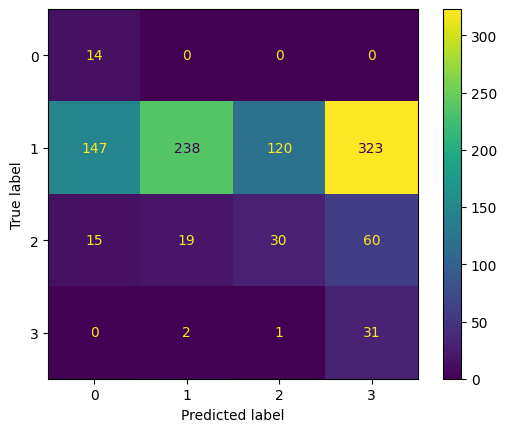

In [82]:
ConfusionMatrixDisplay.from_predictions(valid_y1, y_pred)

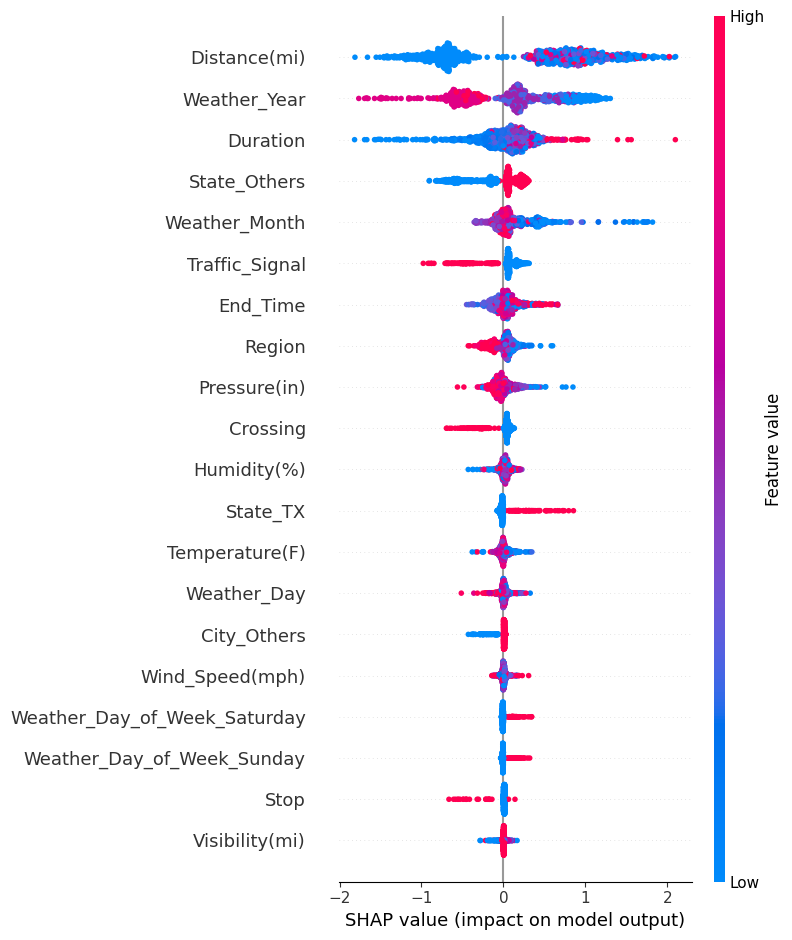

In [83]:
explainer = TreeExplainer(model, model_output='raw')
shap_values = explainer.shap_values(valid_X)
shap.summary_plot(shap_values,valid_X)

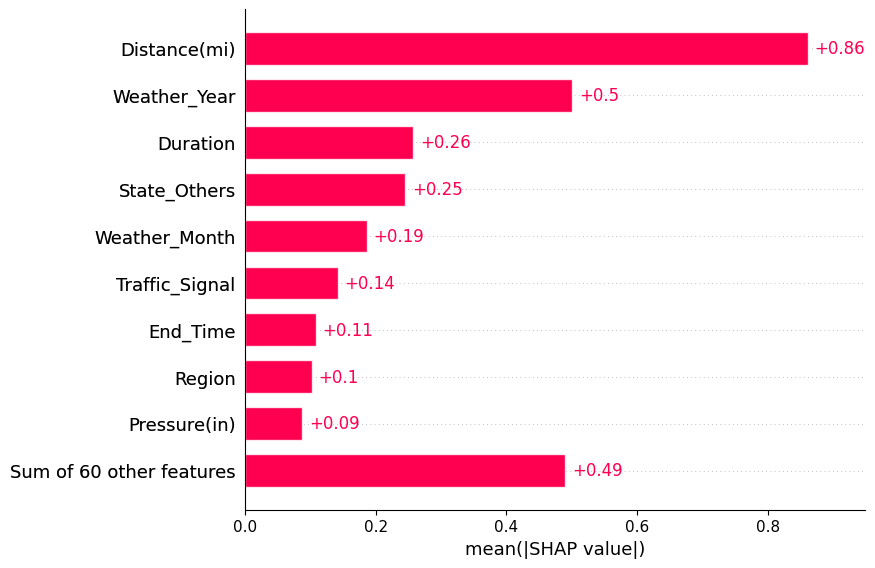

In [84]:
shap_values = explainer(valid_X)
shap.plots.bar(shap_values)

### Mean Average Error

In [85]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, f1_score, cohen_kappa_score, classification_report, accuracy_score
from scipy.stats import kendalltau

In [86]:

accuracy = accuracy_score(valid_y1, y_pred)
tolerance_accuracy = np.mean(np.abs(valid_y1 - y_pred) <= 1)
f1_macro = f1_score(valid_y1, y_pred, average="macro")
f1_weighted = f1_score(valid_y1, y_pred, average="weighted")
tau, _ = kendalltau(valid_y1, y_pred)
kappa_weighted = cohen_kappa_score(valid_y1, y_pred, weights="quadratic")


print("Accuracy:", accuracy)
print("Accuracy within 1 class:", tolerance_accuracy)
print("F1-score (Macro):", f1_macro)
print("F1-score (Weighted):", f1_weighted)
print("Kendall's Tau:", tau)
print("Weighted Kappa:", kappa_weighted)
print(classification_report(valid_y1, y_pred))

Accuracy: 0.313
Accuracy within 1 class: 0.66
F1-score (Macro): 0.2354613950694877
F1-score (Weighted): 0.3964063171618727
Kendall's Tau: 0.19516039219306056
Weighted Kappa: 0.13400015828468104
              precision    recall  f1-score   support

           0       0.08      1.00      0.15        14
           1       0.92      0.29      0.44       828
           2       0.20      0.24      0.22       124
           3       0.07      0.91      0.14        34

    accuracy                           0.31      1000
   macro avg       0.32      0.61      0.24      1000
weighted avg       0.79      0.31      0.40      1000



### ROC

In [87]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

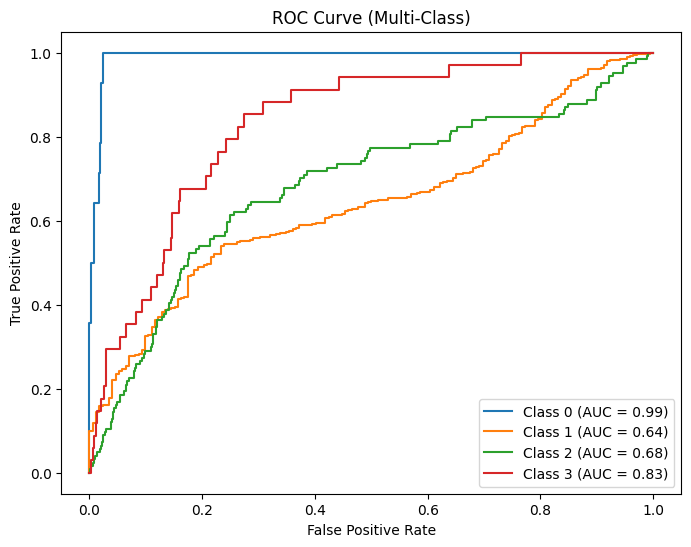

In [88]:
y_true_bin = label_binarize(valid_y1, classes=np.unique(valid_y1))

n_classes = y_true_bin.shape[1]
plt.figure(figsize=(8,6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Multi-Class)")
plt.legend()
plt.show()

Accuracy: 0.301
Accuracy within 1 class: 0.641
F1-score (Macro): 0.19521641240551182
F1-score (Weighted): 0.41003786814564314
Kendall's Tau: 0.14376528500896038
Weighted Kappa: 0.0817164117540301
              precision    recall  f1-score   support

           0       0.04      1.00      0.07         6
           1       0.94      0.30      0.45       857
           2       0.16      0.21      0.18       119
           3       0.04      0.89      0.07        18

    accuracy                           0.30      1000
   macro avg       0.30      0.60      0.20      1000
weighted avg       0.83      0.30      0.41      1000



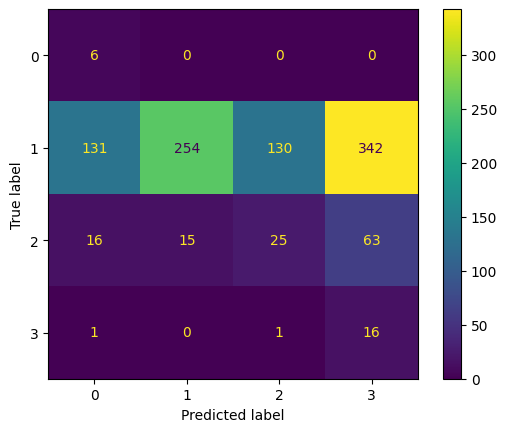

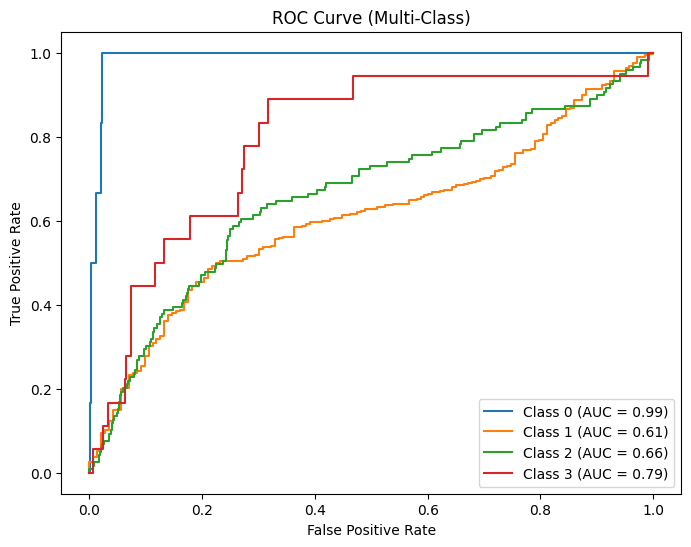

In [89]:
y_pred = model.predict(test_X)
y_pred_prob = model.predict_proba(test_X)

accuracy = accuracy_score(test_y1, y_pred)
tolerance_accuracy = np.mean(np.abs(test_y1 - y_pred) <= 1)
f1_macro = f1_score(test_y1, y_pred, average="macro")
f1_weighted = f1_score(test_y1, y_pred, average="weighted")
tau, _ = kendalltau(test_y1, y_pred)
kappa_weighted = cohen_kappa_score(test_y1, y_pred, weights="quadratic")


print("Accuracy:", accuracy)
print("Accuracy within 1 class:", tolerance_accuracy)
print("F1-score (Macro):", f1_macro)
print("F1-score (Weighted):", f1_weighted)
print("Kendall's Tau:", tau)
print("Weighted Kappa:", kappa_weighted)
print(classification_report(test_y1, y_pred))

ConfusionMatrixDisplay.from_predictions(test_y1, y_pred)

y_true_bin = label_binarize(test_y1, classes=np.unique(test_y1))

n_classes = y_true_bin.shape[1]
plt.figure(figsize=(8,6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Multi-Class)")
plt.legend()
plt.show()

# Evaluate In sample performance

Accuracy: 0.636125
Accuracy within 1 class: 0.89025
F1-score (Macro): 0.5952673429545952
F1-score (Weighted): 0.595267342954595
Kendall's Tau: 0.7147533801857452
Weighted Kappa: 0.7632904077926366
              precision    recall  f1-score   support

           0       0.78      0.98      0.86      2000
           1       0.70      0.37      0.49      2000
           2       0.61      0.25      0.35      2000
           3       0.53      0.95      0.68      2000

    accuracy                           0.64      8000
   macro avg       0.65      0.64      0.60      8000
weighted avg       0.65      0.64      0.60      8000



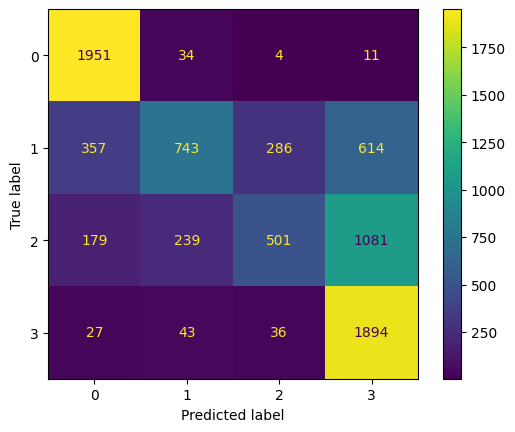

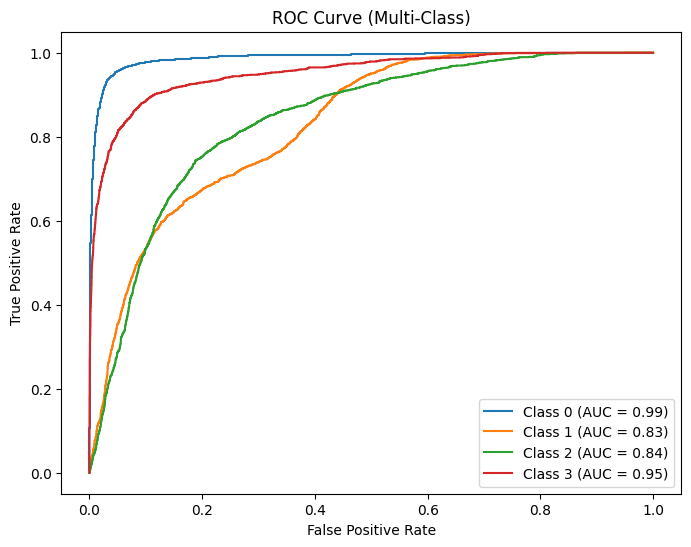

In [90]:
y_pred = model.predict(train_X)
y_pred_prob = model.predict_proba(train_X)

accuracy = accuracy_score(train_y1, y_pred)
tolerance_accuracy = np.mean(np.abs(train_y1 - y_pred) <= 1)
f1_macro = f1_score(train_y1, y_pred, average="macro")
f1_weighted = f1_score(train_y1, y_pred, average="weighted")
tau, _ = kendalltau(train_y1, y_pred)
kappa_weighted = cohen_kappa_score(train_y1, y_pred, weights="quadratic")


print("Accuracy:", accuracy)
print("Accuracy within 1 class:", tolerance_accuracy)
print("F1-score (Macro):", f1_macro)
print("F1-score (Weighted):", f1_weighted)
print("Kendall's Tau:", tau)
print("Weighted Kappa:", kappa_weighted)
print(classification_report(train_y1, y_pred))

ConfusionMatrixDisplay.from_predictions(train_y1, y_pred)

y_true_bin = label_binarize(train_y1, classes=np.unique(train_y1))

n_classes = y_true_bin.shape[1]
plt.figure(figsize=(8,6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Multi-Class)")
plt.legend()
plt.show()

# Fine-tuning

In [40]:
!pip install scikit-optimize

In [91]:
from sklearn.model_selection import KFold, StratifiedKFold, RandomizedSearchCV, GridSearchCV
from skopt import BayesSearchCV
from skopt.callbacks import DeadlineStopper, DeltaYStopper
from skopt.space import Real, Categorical, Integer

# from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import make_scorer, cohen_kappa_score

In [92]:
def evaluate_results(y_pred, y_pred_prob, y_true):
    

    accuracy = accuracy_score(y_true, y_pred)
    tolerance_accuracy = np.mean(np.abs(y_true - y_pred) <= 1)
    f1_macro = f1_score(y_true, y_pred, average="macro")
    f1_weighted = f1_score(y_true, y_pred, average="weighted")
    tau, _ = kendalltau(y_true, y_pred)
    kappa_weighted = cohen_kappa_score(y_true, y_pred, weights="quadratic")



    print("Accuracy:", accuracy)
    print("Accuracy within 1 class:", tolerance_accuracy)
    print("F1-score (Macro):", f1_macro)
    print("F1-score (Weighted):", f1_weighted)
    print("Kendall's Tau:", tau)
    print("Weighted Kappa:", kappa_weighted)
    print(classification_report(y_true, y_pred))

    ConfusionMatrixDisplay.from_predictions(y_true, y_pred)

    y_true_bin = label_binarize(y_true, classes=np.unique(y_true))

    n_classes = y_true_bin.shape[1]
    plt.figure(figsize=(8,6))

    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve (Multi-Class)")
    plt.legend()
    plt.show()

def tune_evaluate(scoring, search_spaces, train_X, train_y, test_X, test_y):
    model = LGBMOrdinal()
    opt = BayesSearchCV(estimator=model,                                    
                    search_spaces=search_spaces,                      
                    scoring=scoring,                           
                    cv=5,                                           
                    n_iter=60,
                    n_points=3,
                    n_jobs=-1,
                    iid=False,
                    return_train_score=False,                         
                    refit=True,                                      
                    optimizer_kwargs={'base_estimator': 'GP'},        
                    random_state=42)
    
    opt.fit(train_X, train_y)
    best_model = opt.best_estimator_
    print("Best optimzer score: ", opt.best_score_)
    print("Best parameters: ", opt.best_params_)

    print("######### Evaluate Test Data Fit #########")
    y_pred = best_model.predict(test_X)
    y_pred_prob = best_model.predict_proba(test_X)

    evaluate_results(y_pred, y_pred_prob, test_y)

    print("######### Evaluate Train Data Fit #########")
    y_pred = best_model.predict(train_X)
    y_pred_prob = best_model.predict_proba(train_X)

    evaluate_results(y_pred, y_pred_prob, train_y)

    return best_model, opt.best_params_
    

In [43]:
def random_search_evaluate(search_spaces, train_X, train_y, test_X, test_y):
    model = LGBMOrdinal()
    random_search = RandomizedSearchCV(model, param_distributions=search_spaces, n_iter=20, cv=5, scoring="accuracy", random_state=42)
    random_search.fit(train_X, train_y)
    
    best_model = random_search.best_estimator_
    print("Best parameters: ", random_search.best_params_)

    y_pred = best_model.predict(test_X)
    y_pred_prob = best_model.predict_proba(test_X)

    evaluate_results(y_pred, y_pred_prob, test_y)

    return best_model, random_search.best_params_

In [44]:
def grid_search_evaluate(search_spaces, train_X, train_y, test_X, test_y):
    model = LGBMOrdinal()
    grid_search = GridSearchCV(model, param_grid=search_spaces, cv=5, scoring="accuracy")
    grid_search.fit(train_X, train_y)
    
    best_model = grid_search.best_estimator_
    print("Best parameters: ", grid_search.best_params_)

    y_pred = best_model.predict(test_X)
    y_pred_prob = best_model.predict_proba(test_X)

    evaluate_results(y_pred, y_pred_prob, test_y)

    return best_model, grid_search.best_params_

## F1

Best optimzer score:  0.15644401765603397
Best parameters:  OrderedDict([('colsample_bytree', 0.7616767330702715), ('learning_rate', 0.39978091287041906), ('max_depth', 256), ('n_estimators', 4237), ('num_leaves', 512), ('reg_alpha', 0.5), ('reg_lambda', 0.5), ('subsample', 1.0), ('subsample_freq', 10)])
######### Evaluate Test Data Fit #########
Accuracy: 0.338
Accuracy within 1 class: 0.693
F1-score (Macro): 0.25109904528421784
F1-score (Weighted): 0.41493605831422703
Kendall's Tau: 0.10972265071379676
Weighted Kappa: 0.0973947036512467
              precision    recall  f1-score   support

           0       0.10      1.00      0.19        14
           1       0.85      0.32      0.46       828
           2       0.17      0.28      0.21       124
           3       0.08      0.82      0.14        34

    accuracy                           0.34      1000
   macro avg       0.30      0.61      0.25      1000
weighted avg       0.73      0.34      0.41      1000



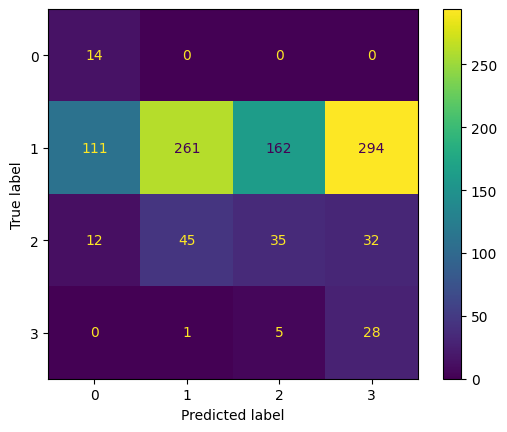

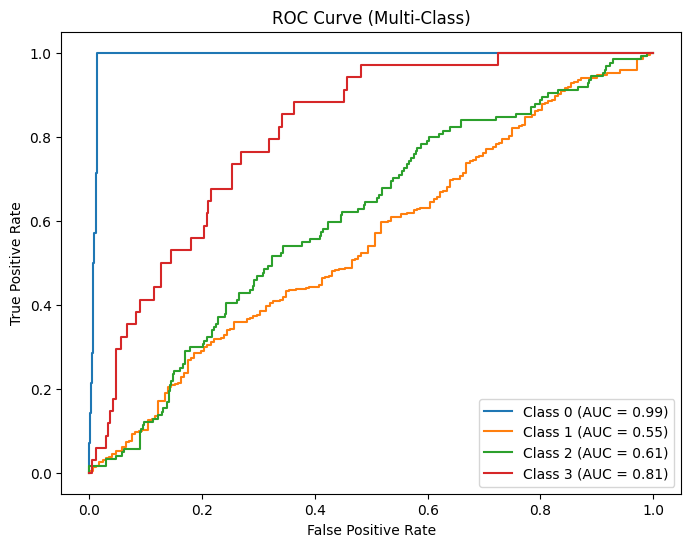

######### Evaluate Train Data Fit #########
Accuracy: 0.99975
Accuracy within 1 class: 1.0
F1-score (Macro): 0.9997500312109512
F1-score (Weighted): 0.9997500312109511
Kendall's Tau: 0.9998333541562533
Weighted Kappa: 0.9998999899989999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000
           1       1.00      1.00      1.00      2000
           2       1.00      1.00      1.00      2000
           3       1.00      1.00      1.00      2000

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



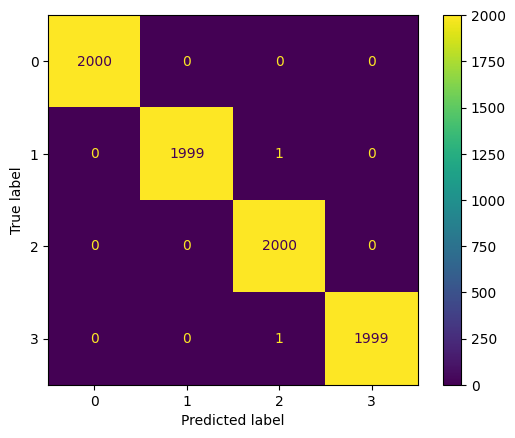

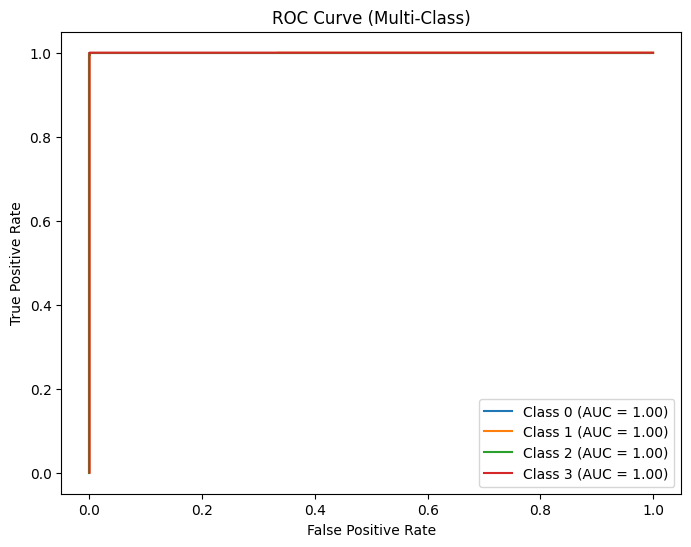

In [93]:

scoring_f1 = make_scorer(f1_score, average="macro", greater_is_better=True)
scoring_qwk = make_scorer(cohen_kappa_score, weights='quadratic')


search_spaces = {
    'learning_rate': Real(0.01, 1.0, 'log-uniform'),
    'n_estimators': Integer(30, 5000),
    'num_leaves': Integer(2, 512),                       # Maximum tree leaves for base learners
    'max_depth': Integer(-1, 256),                       # Maximum tree depth for base learners, <=0 means no limit
    'subsample': Real(0.01, 1.0, 'uniform'),             # Subsample ratio of the training instance
    'subsample_freq': Integer(1, 10),                    # Frequency of subsample, <=0 means no enable
    'colsample_bytree': Real(0.01, 1.0, 'uniform'),      # Subsample ratio of columns when constructing each tree
    'reg_lambda': Real(0.5, 100.0, 'log-uniform'),      # L2 regularization
    'reg_alpha': Real(0.5, 100.0, 'log-uniform'),       # L1 regularization
   }

best_model_f1_1, best_params_f1_1 = tune_evaluate(scoring_f1, search_spaces, train_X, train_y1, valid_X, valid_y1)

## Weighted F1

Best optimzer score:  0.15644401765603397
Best parameters:  OrderedDict([('colsample_bytree', 0.7616767330702715), ('learning_rate', 0.39978091287041906), ('max_depth', 256), ('n_estimators', 4237), ('num_leaves', 512), ('reg_alpha', 0.5), ('reg_lambda', 0.5), ('subsample', 1.0), ('subsample_freq', 10)])
######### Evaluate Test Data Fit #########
Accuracy: 0.338
Accuracy within 1 class: 0.693
F1-score (Macro): 0.25109904528421784
F1-score (Weighted): 0.41493605831422703
Kendall's Tau: 0.10972265071379676
Weighted Kappa: 0.0973947036512467
              precision    recall  f1-score   support

           0       0.10      1.00      0.19        14
           1       0.85      0.32      0.46       828
           2       0.17      0.28      0.21       124
           3       0.08      0.82      0.14        34

    accuracy                           0.34      1000
   macro avg       0.30      0.61      0.25      1000
weighted avg       0.73      0.34      0.41      1000



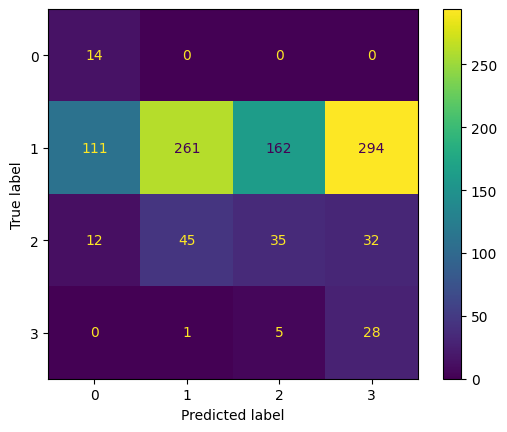

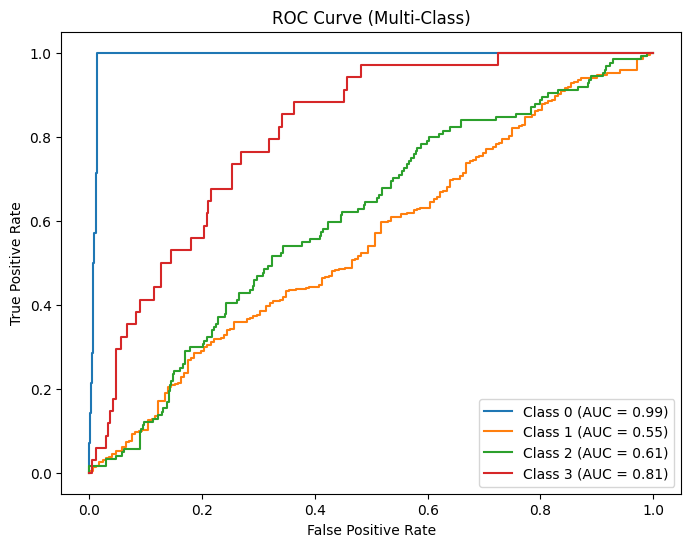

######### Evaluate Train Data Fit #########
Accuracy: 0.99975
Accuracy within 1 class: 1.0
F1-score (Macro): 0.9997500312109512
F1-score (Weighted): 0.9997500312109511
Kendall's Tau: 0.9998333541562533
Weighted Kappa: 0.9998999899989999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000
           1       1.00      1.00      1.00      2000
           2       1.00      1.00      1.00      2000
           3       1.00      1.00      1.00      2000

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



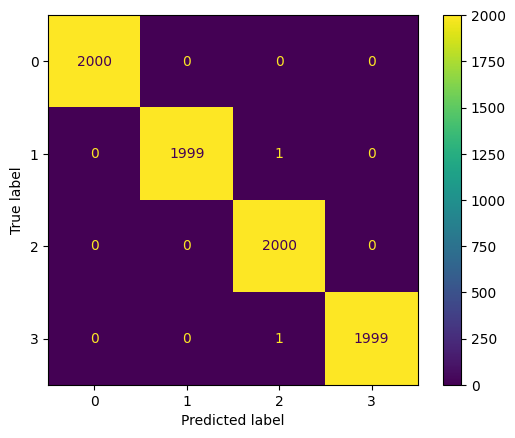

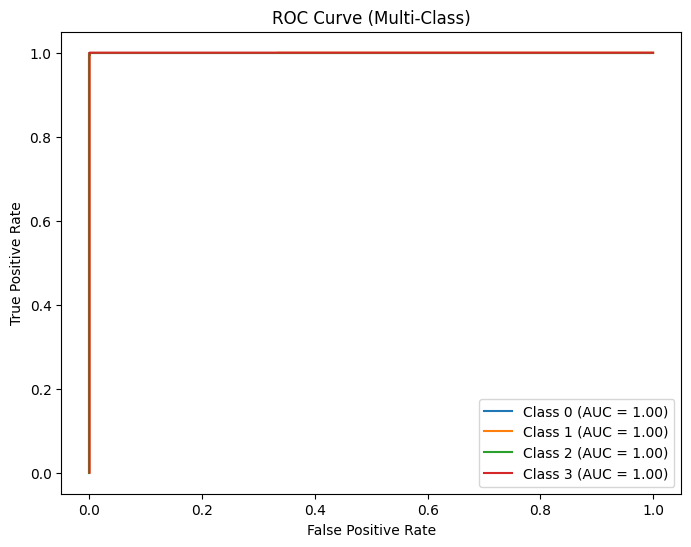

In [94]:
scoring_f1_weighted = make_scorer(f1_score, average="weighted", greater_is_better=True)
best_model, best_params = tune_evaluate(scoring_f1, search_spaces, train_X, train_y1, valid_X, valid_y1)

## Mean Squared Error

Best optimzer score:  -1.496125
Best parameters:  OrderedDict([('colsample_bytree', 0.9293897993738788), ('learning_rate', 0.7365143901035395), ('max_depth', 89), ('n_estimators', 2811), ('num_leaves', 149), ('reg_alpha', 6.601590346886545), ('reg_lambda', 2.2447685620215543), ('subsample', 0.9917099670411417), ('subsample_freq', 6)])
######### Evaluate Test Data Fit #########
Accuracy: 0.421
Accuracy within 1 class: 0.756
F1-score (Macro): 0.2926168823041496
F1-score (Weighted): 0.5057804778602991
Kendall's Tau: 0.15179711482179872
Weighted Kappa: 0.12855391798436056
              precision    recall  f1-score   support

           0       0.12      1.00      0.21        14
           1       0.90      0.41      0.56       828
           2       0.19      0.34      0.25       124
           3       0.09      0.71      0.15        34

    accuracy                           0.42      1000
   macro avg       0.32      0.61      0.29      1000
weighted avg       0.77      0.42      0.51  

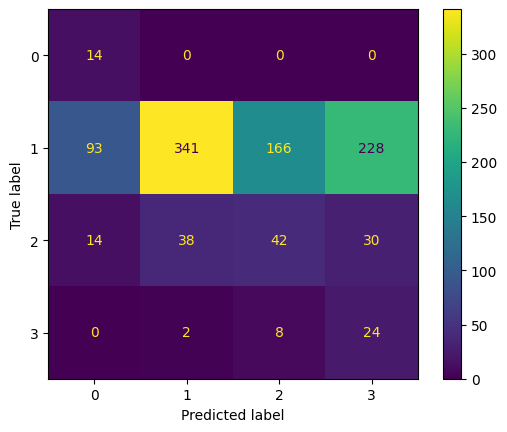

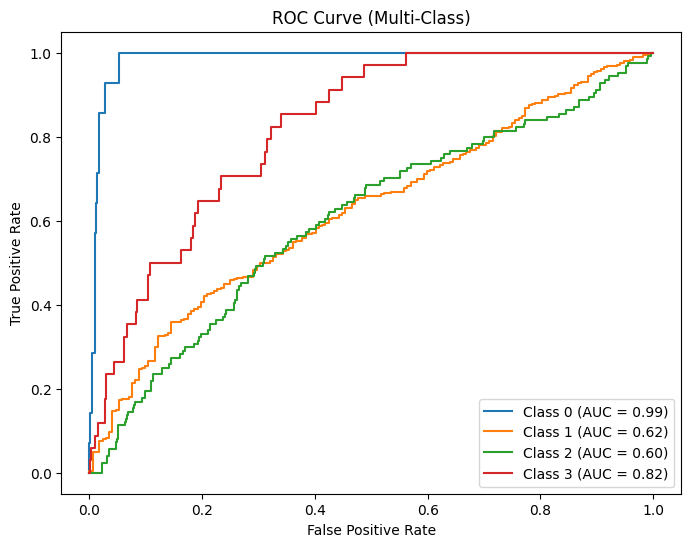

######### Evaluate Train Data Fit #########
Accuracy: 0.8255
Accuracy within 1 class: 0.985875
F1-score (Macro): 0.8166174449718708
F1-score (Weighted): 0.8166174449718709
Kendall's Tau: 0.8794661505763832
Weighted Kappa: 0.9165098777046096
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      2000
           1       0.80      0.79      0.79      2000
           2       0.79      0.56      0.65      2000
           3       0.78      0.97      0.87      2000

    accuracy                           0.83      8000
   macro avg       0.82      0.83      0.82      8000
weighted avg       0.82      0.83      0.82      8000



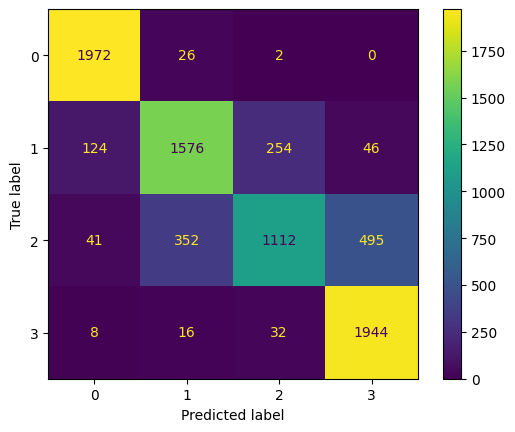

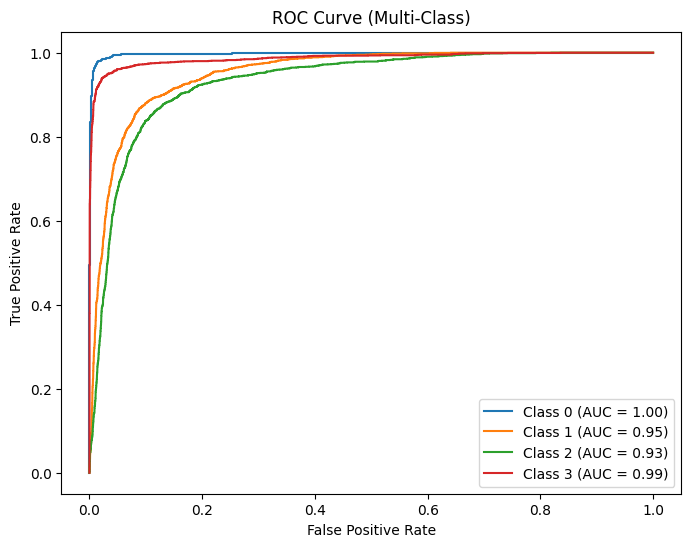

In [95]:
scoring_mse = make_scorer(mean_squared_error, greater_is_better=False)
best_model_mse1, best_params_mse1 = tune_evaluate(scoring_mse, search_spaces, train_X, train_y1, valid_X, valid_y1)

## Mean Absoute Error

Best optimzer score:  -0.9640000000000001
Best parameters:  OrderedDict([('colsample_bytree', 0.7400193361198684), ('learning_rate', 0.4170053959840157), ('max_depth', 85), ('n_estimators', 2582), ('num_leaves', 337), ('reg_alpha', 0.6720961466690452), ('reg_lambda', 0.7549705332723932), ('subsample', 1.0), ('subsample_freq', 8)])
######### Evaluate Test Data Fit #########
Accuracy: 0.351
Accuracy within 1 class: 0.696
F1-score (Macro): 0.2562046809201905
F1-score (Weighted): 0.4325752233071662
Kendall's Tau: 0.12656015803861237
Weighted Kappa: 0.10592984441690134
              precision    recall  f1-score   support

           0       0.10      1.00      0.19        14
           1       0.88      0.33      0.48       828
           2       0.17      0.27      0.21       124
           3       0.08      0.82      0.14        34

    accuracy                           0.35      1000
   macro avg       0.31      0.61      0.26      1000
weighted avg       0.75      0.35      0.43      

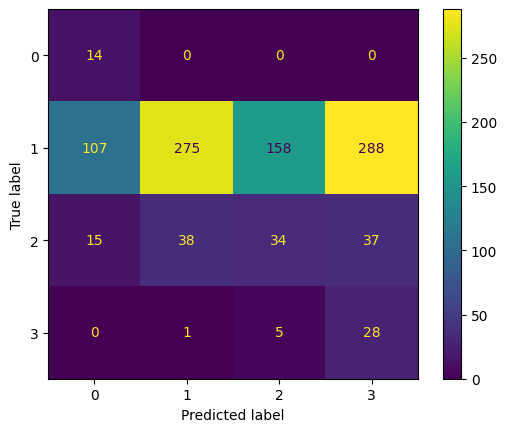

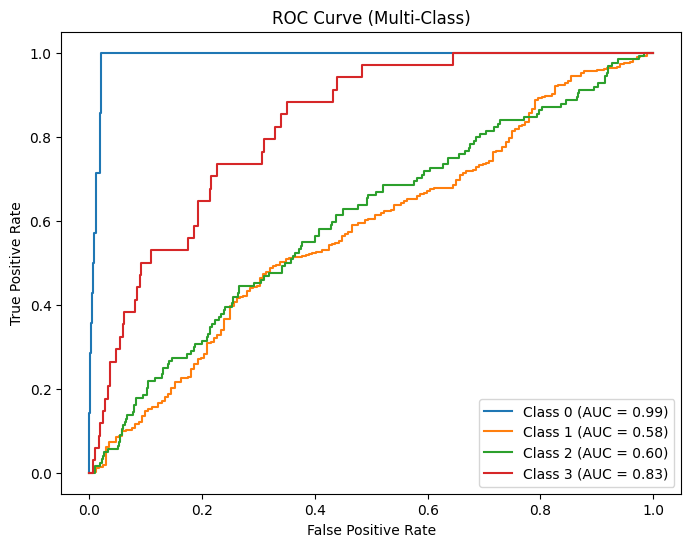

######### Evaluate Train Data Fit #########
Accuracy: 0.999375
Accuracy within 1 class: 0.999875
F1-score (Macro): 0.9993751242581708
F1-score (Weighted): 0.9993751242581709
Kendall's Tau: 0.9994172705784851
Weighted Kappa: 0.99960019990005
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000
           1       1.00      1.00      1.00      2000
           2       1.00      1.00      1.00      2000
           3       1.00      1.00      1.00      2000

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



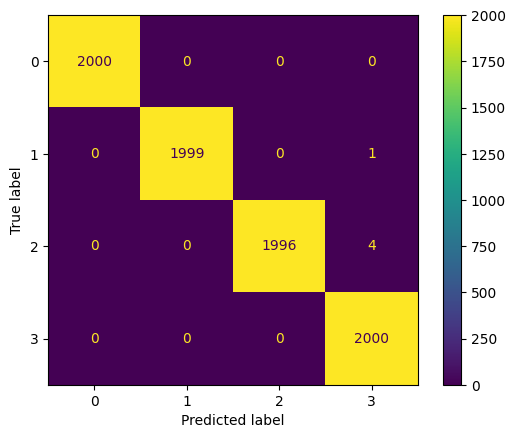

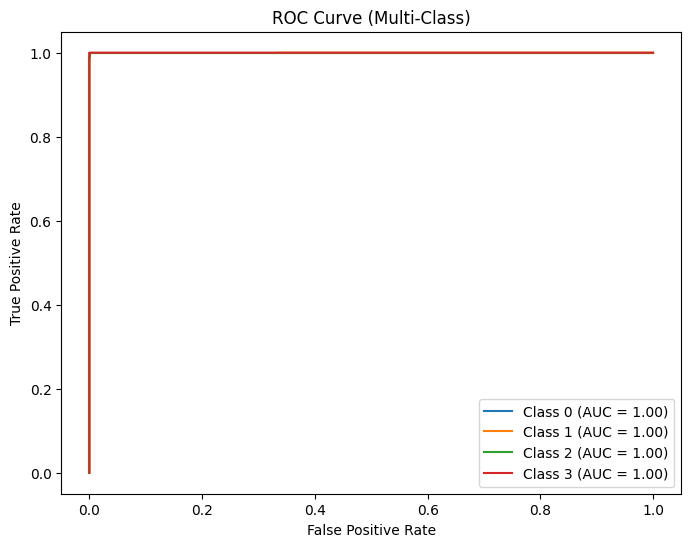

In [96]:
scoring_mae = make_scorer(mean_absolute_error, greater_is_better=False)
best_model, best_params = tune_evaluate(scoring_mae, search_spaces, train_X, train_y1, valid_X, valid_y1)

# Feature Selection

In [51]:
from sklearn.feature_selection import SequentialFeatureSelector, RFE
from sklearn.preprocessing import OneHotEncoder

In [52]:
def feature_selection_evaluate(n_features, train_X, train_y, test_X, test_y):
    model = LGBMOrdinal()
    selector = RFE(model, n_features_to_select=n_features, step=1)
    selector = selector.fit(train_X, train_y)
    selector.get_support()
    selector.transform(train_X).shape
    selected_features = train_X.columns[selector.support_]

    model.fit(train_X[selected_features], train_y)
    y_pred = model.predict(test_X[selected_features])
    y_pred_prob = model.predict_proba(test_X[selected_features])

    print("Selected features: ", selected_features)
    evaluate_results(y_pred, y_pred_prob, test_y)

    return selected_features

Selected features:  Index(['End_Time', 'Distance(mi)', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Crossing', 'Junction', 'Stop', 'Traffic_Signal',
       'Duration', 'Region', 'State_CA', 'State_Others', 'State_TX',
       'City_Charlotte', 'City_Others', 'Weather_Year', 'Weather_Month',
       'Weather_Day', 'Wind_Direction_S', 'Weather_Day_of_Week_Saturday',
       'Weather_Day_of_Week_Sunday'],
      dtype='object')
Accuracy: 0.324
Accuracy within 1 class: 0.662
F1-score (Macro): 0.24487700132744702
F1-score (Weighted): 0.40814371327134974
Kendall's Tau: 0.1940149409804615
Weighted Kappa: 0.13362479083959444
              precision    recall  f1-score   support

           0       0.09      1.00      0.16        14
           1       0.94      0.30      0.45       828
           2       0.20      0.27      0.23       124
           3       0.08      0.94      0.14        34

    accuracy                  

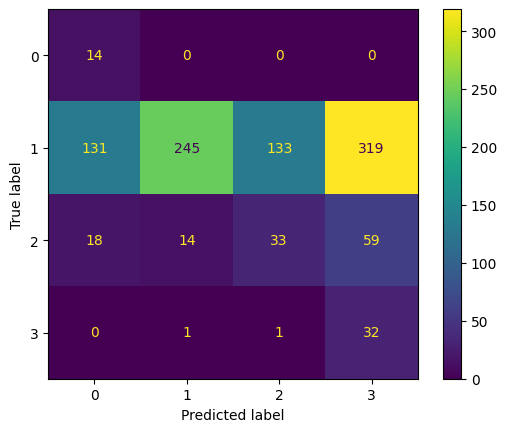

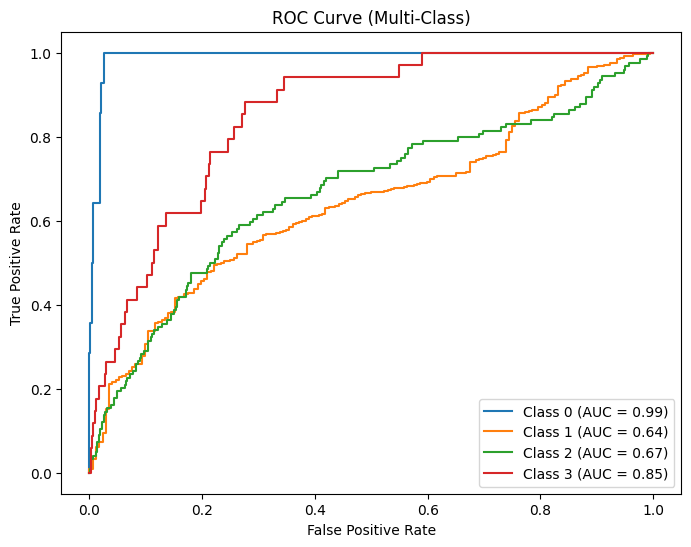

In [97]:
selected_features_25 = feature_selection_evaluate(25, train_X, train_y1, valid_X, valid_y1)

Selected features:  Index(['End_Time', 'Distance(mi)', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Crossing',
       'Traffic_Signal', 'Duration', 'Region', 'State_Others', 'Weather_Year',
       'Weather_Month', 'Weather_Day'],
      dtype='object')
Accuracy: 0.337
Accuracy within 1 class: 0.643
F1-score (Macro): 0.2540446813144688
F1-score (Weighted): 0.42667781860090687
Kendall's Tau: 0.1814001136967493
Weighted Kappa: 0.12429195924270942
              precision    recall  f1-score   support

           0       0.09      1.00      0.17        14
           1       0.95      0.31      0.47       828
           2       0.22      0.27      0.24       124
           3       0.07      0.91      0.13        34

    accuracy                           0.34      1000
   macro avg       0.33      0.62      0.25      1000
weighted avg       0.82      0.34      0.43      1000



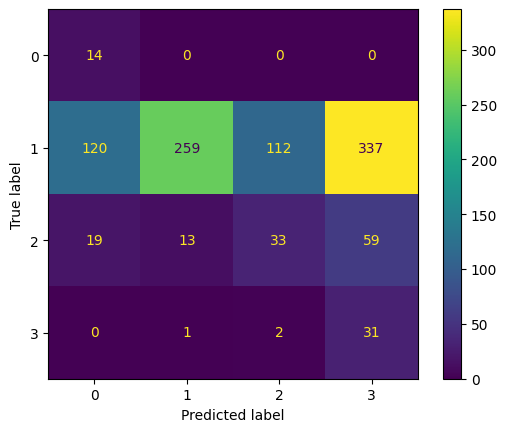

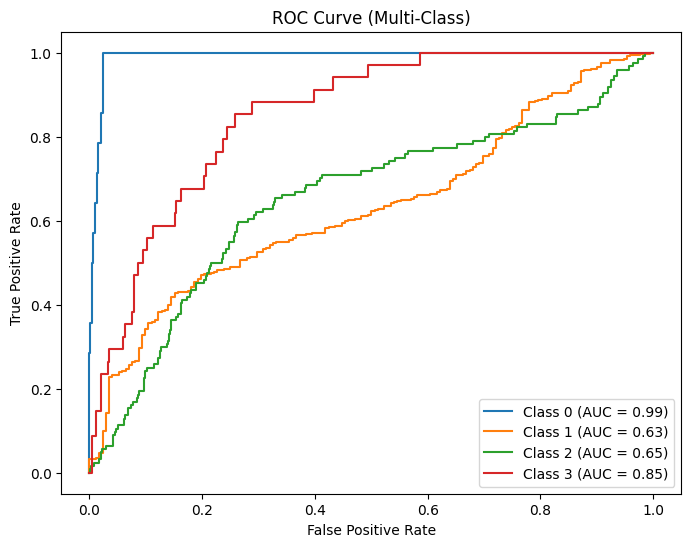

In [98]:
selected_features_15 = feature_selection_evaluate(15, train_X, train_y1, valid_X, valid_y1)

Selected features:  Index(['End_Time', 'Distance(mi)', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Crossing', 'Stop',
       'Traffic_Signal', 'Duration', 'Region', 'State_Others', 'State_TX',
       'City_Others', 'Weather_Year', 'Weather_Month', 'Weather_Day',
       'Wind_Direction_S', 'Weather_Day_of_Week_Saturday'],
      dtype='object')
Accuracy: 0.325
Accuracy within 1 class: 0.661
F1-score (Macro): 0.24705640281202873
F1-score (Weighted): 0.4087390189247486
Kendall's Tau: 0.18190936139972538
Weighted Kappa: 0.12799327132396598
              precision    recall  f1-score   support

           0       0.08      1.00      0.15        14
           1       0.93      0.30      0.45       828
           2       0.21      0.28      0.24       124
           3       0.08      0.91      0.14        34

    accuracy                           0.33      1000
   macro avg       0.33      0.62      0.25      1000
weighted avg       0.80      

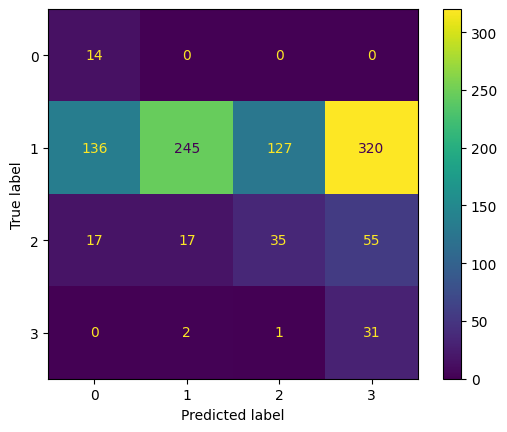

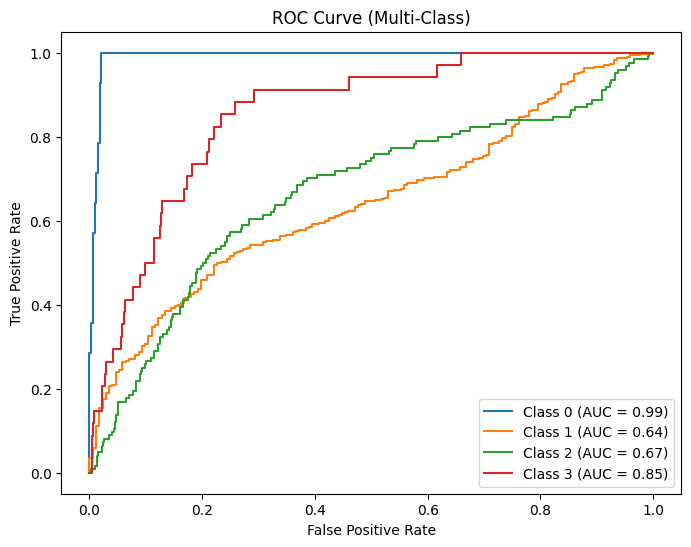

In [99]:
selected_features_20 = feature_selection_evaluate(20, train_X, train_y1, valid_X, valid_y1)

# Feature Selection + Fine-tuning

Best optimzer score:  -1.4949999999999999
Best parameters:  OrderedDict([('colsample_bytree', 1.0), ('learning_rate', 0.5170352556204258), ('max_depth', 256), ('n_estimators', 3824), ('num_leaves', 265), ('reg_alpha', 10.295908952476346), ('reg_lambda', 0.5), ('subsample', 1.0), ('subsample_freq', 2)])
######### Evaluate Test Data Fit #########
Accuracy: 0.464
Accuracy within 1 class: 0.752
F1-score (Macro): 0.3330089109057049
F1-score (Weighted): 0.5455453049885665
Kendall's Tau: 0.18127754354307823
Weighted Kappa: 0.14631153226408855
              precision    recall  f1-score   support

           0       0.16      1.00      0.27        14
           1       0.91      0.45      0.60       828
           2       0.23      0.37      0.28       124
           3       0.10      0.85      0.18        34

    accuracy                           0.46      1000
   macro avg       0.35      0.67      0.33      1000
weighted avg       0.79      0.46      0.55      1000



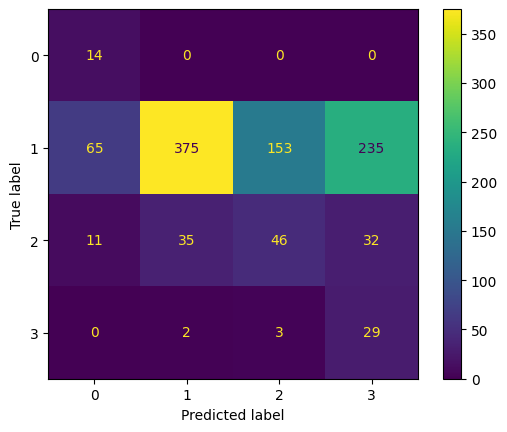

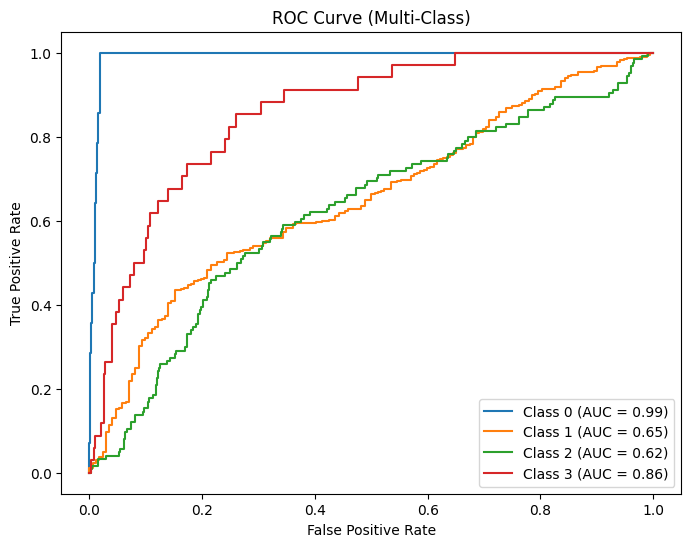

######### Evaluate Train Data Fit #########
Accuracy: 0.719875
Accuracy within 1 class: 0.934875
F1-score (Macro): 0.7070661968135687
F1-score (Weighted): 0.7070661968135689
Kendall's Tau: 0.761989953202707
Weighted Kappa: 0.8179118329466357
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2000
           1       0.65      0.61      0.63      2000
           2       0.64      0.43      0.51      2000
           3       0.68      0.90      0.77      2000

    accuracy                           0.72      8000
   macro avg       0.71      0.72      0.71      8000
weighted avg       0.71      0.72      0.71      8000



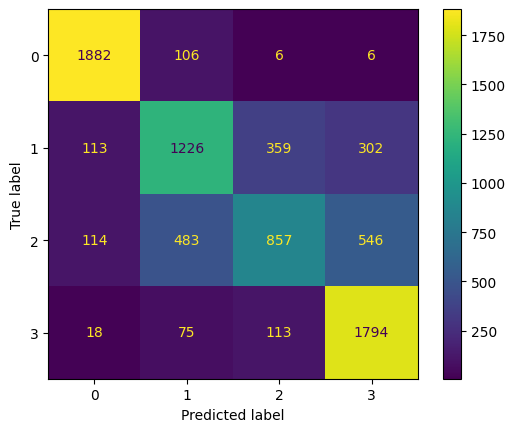

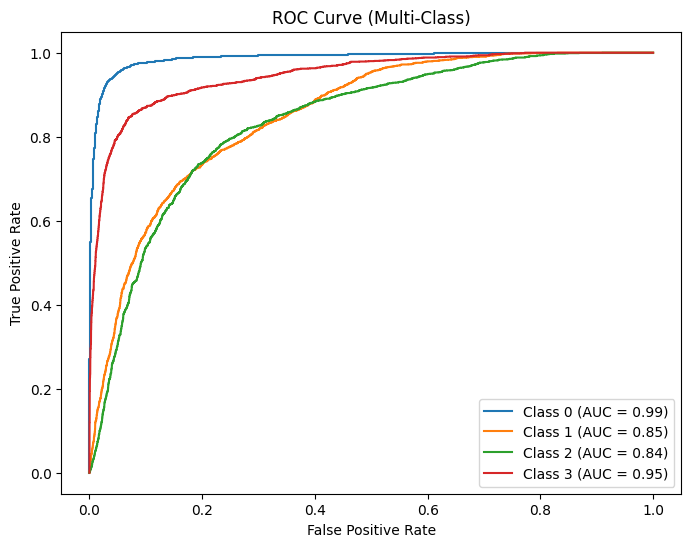

In [100]:
scoring_mse = make_scorer(mean_squared_error, greater_is_better=False)

scoring_mae = make_scorer(mean_absolute_error, greater_is_better=False)

search_spaces = {
    'learning_rate': Real(0.01, 1.0, 'log-uniform'),
    'n_estimators': Integer(30, 5000),
    'num_leaves': Integer(2, 512),                       # Maximum tree leaves for base learners
    'max_depth': Integer(-1, 256),                       # Maximum tree depth for base learners, <=0 means no limit
    'subsample': Real(0.01, 1.0, 'uniform'),             # Subsample ratio of the training instance
    'subsample_freq': Integer(1, 10),                    # Frequency of subsample, <=0 means no enable
    'colsample_bytree': Real(0.01, 1.0, 'uniform'),      # Subsample ratio of columns when constructing each tree
    'reg_lambda': Real(0.5, 100.0, 'log-uniform'),      # L2 regularization
    'reg_alpha': Real(0.5, 100.0, 'log-uniform'),       # L1 regularization
   }

best_model_mse, best_model_params = tune_evaluate(scoring_mse, search_spaces, train_X[selected_features_15], train_y1, valid_X[selected_features_15], valid_y1)

Best optimzer score:  -0.967625
Best parameters:  OrderedDict([('colsample_bytree', 0.9959987188016904), ('learning_rate', 0.5226866837328615), ('max_depth', 248), ('n_estimators', 5000), ('num_leaves', 437), ('reg_alpha', 0.8049332578279336), ('reg_lambda', 0.5), ('subsample', 0.9839286537113623), ('subsample_freq', 3)])
######### Evaluate Test Data Fit #########
Accuracy: 0.373
Accuracy within 1 class: 0.717
F1-score (Macro): 0.2790244064201785
F1-score (Weighted): 0.44974010025374056
Kendall's Tau: 0.09916906371303427
Weighted Kappa: 0.09328143659604582
              precision    recall  f1-score   support

           0       0.11      1.00      0.20        14
           1       0.88      0.34      0.49       828
           2       0.21      0.40      0.27       124
           3       0.08      0.76      0.15        34

    accuracy                           0.37      1000
   macro avg       0.32      0.63      0.28      1000
weighted avg       0.76      0.37      0.45      1000



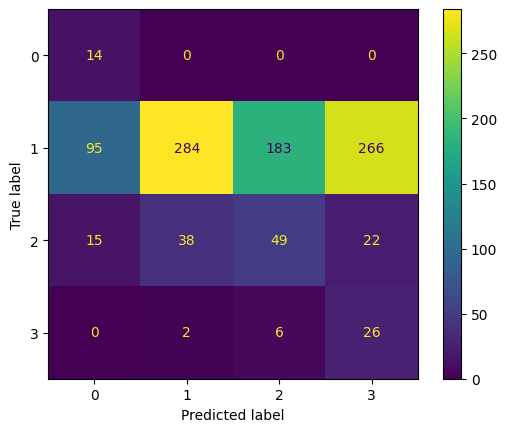

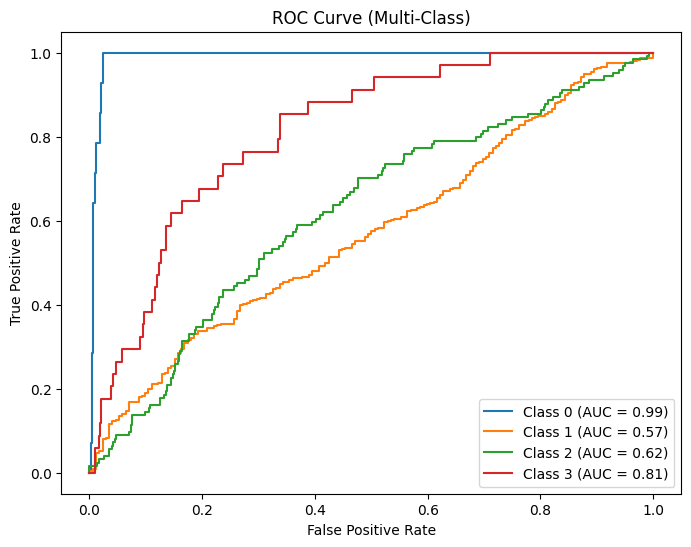

######### Evaluate Train Data Fit #########
Accuracy: 0.99975
Accuracy within 1 class: 1.0
F1-score (Macro): 0.9997500312109512
F1-score (Weighted): 0.9997500312109511
Kendall's Tau: 0.9998333541562533
Weighted Kappa: 0.9998999899989999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000
           1       1.00      1.00      1.00      2000
           2       1.00      1.00      1.00      2000
           3       1.00      1.00      1.00      2000

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



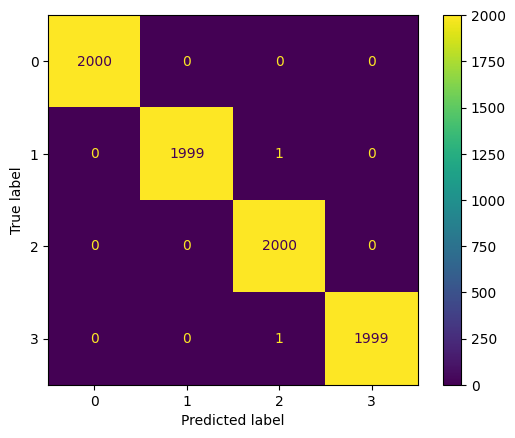

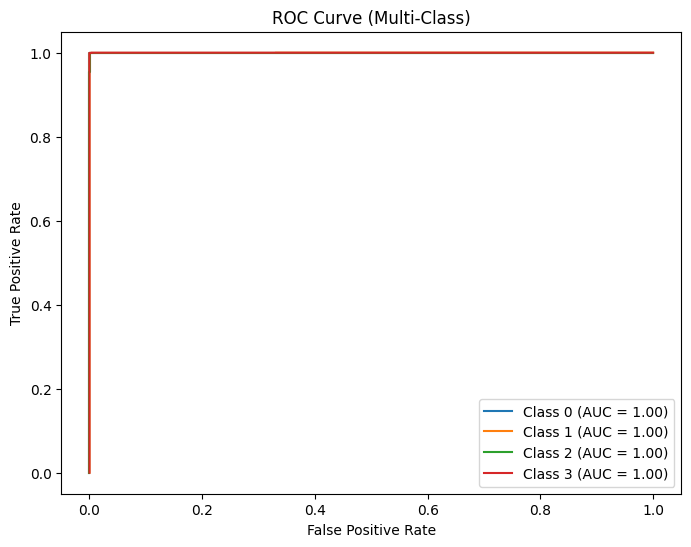

In [102]:
best_model_mae, best_params_mae = tune_evaluate(scoring_mae, search_spaces, train_X[selected_features_15], train_y1, valid_X[selected_features_15], valid_y1)

Best optimzer score:  0.15731307118509763
Best parameters:  OrderedDict([('colsample_bytree', 1.0), ('learning_rate', 1.0), ('max_depth', -1), ('n_estimators', 5000), ('num_leaves', 512), ('reg_alpha', 0.5), ('reg_lambda', 0.74153547757506), ('subsample', 1.0), ('subsample_freq', 10)])
######### Evaluate Test Data Fit #########
Accuracy: 0.317
Accuracy within 1 class: 0.71
F1-score (Macro): 0.23405984607939298
F1-score (Weighted): 0.39478187765064954
Kendall's Tau: 0.11995658018580858
Weighted Kappa: 0.10066768088490152
              precision    recall  f1-score   support

           0       0.07      1.00      0.13        14
           1       0.86      0.29      0.44       828
           2       0.18      0.29      0.22       124
           3       0.08      0.76      0.14        34

    accuracy                           0.32      1000
   macro avg       0.30      0.59      0.23      1000
weighted avg       0.74      0.32      0.39      1000



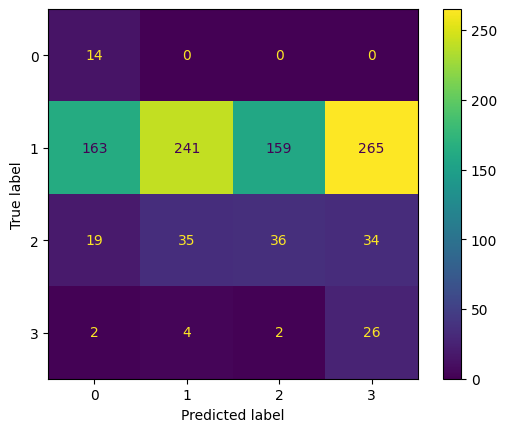

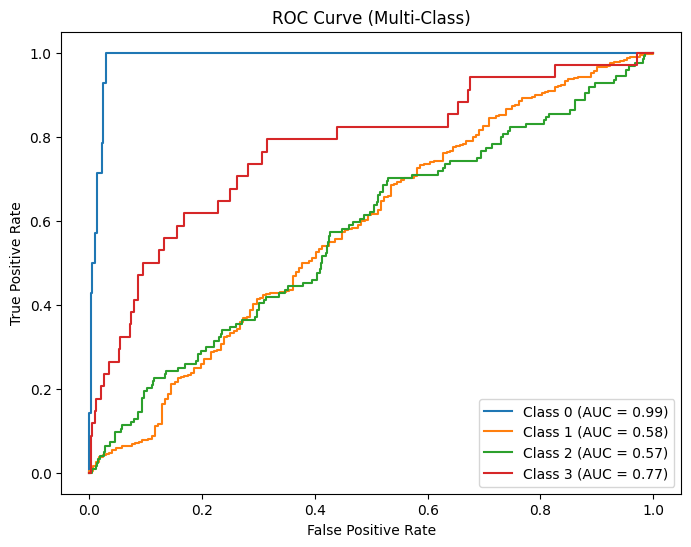

######### Evaluate Train Data Fit #########
Accuracy: 0.999625
Accuracy within 1 class: 1.0
F1-score (Macro): 0.9996250312343771
F1-score (Weighted): 0.999625031234377
Kendall's Tau: 0.9997500208281257
Weighted Kappa: 0.99985
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000
           1       1.00      1.00      1.00      2000
           2       1.00      1.00      1.00      2000
           3       1.00      1.00      1.00      2000

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



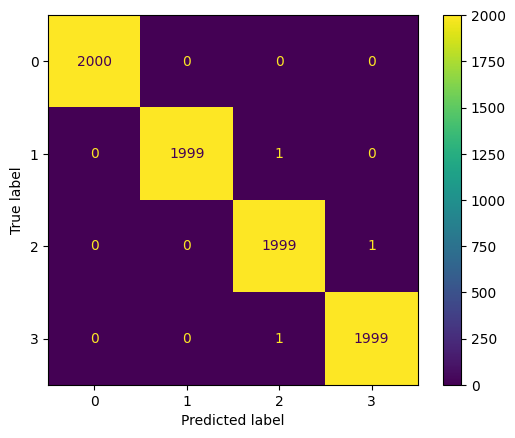

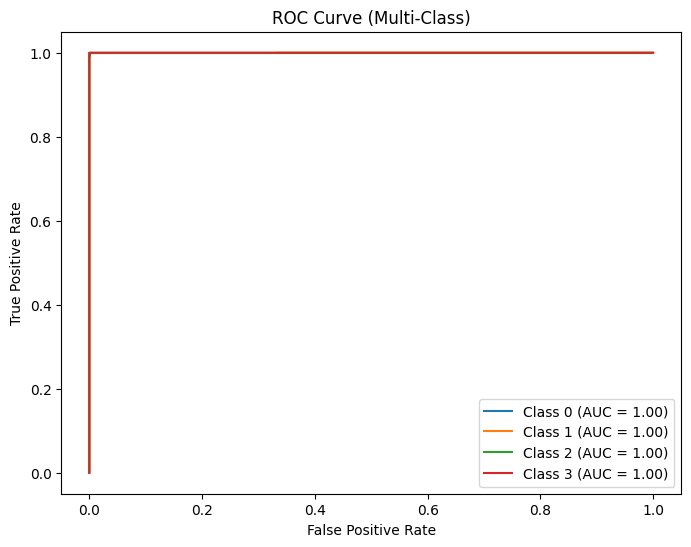

In [101]:
scoring_f1 = make_scorer(f1_score, average="macro", greater_is_better=True)
best_model_f1, best_params_f1 = tune_evaluate(scoring_f1, search_spaces, train_X[selected_features_15], train_y1, valid_X[selected_features_15], valid_y1)

# Evaluate on Test Set

Accuracy: 0.445
Accuracy within 1 class: 0.747
F1-score (Macro): 0.26029579096932776
F1-score (Weighted): 0.547342097668193
Kendall's Tau: 0.09706811280739754
Weighted Kappa: 0.07322049904160188
              precision    recall  f1-score   support

           0       0.06      0.83      0.12         6
           1       0.90      0.46      0.61       857
           2       0.17      0.29      0.22       119
           3       0.05      0.83      0.10        18

    accuracy                           0.45      1000
   macro avg       0.30      0.60      0.26      1000
weighted avg       0.80      0.45      0.55      1000



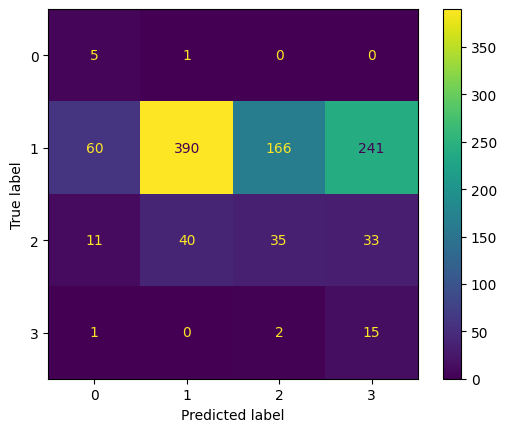

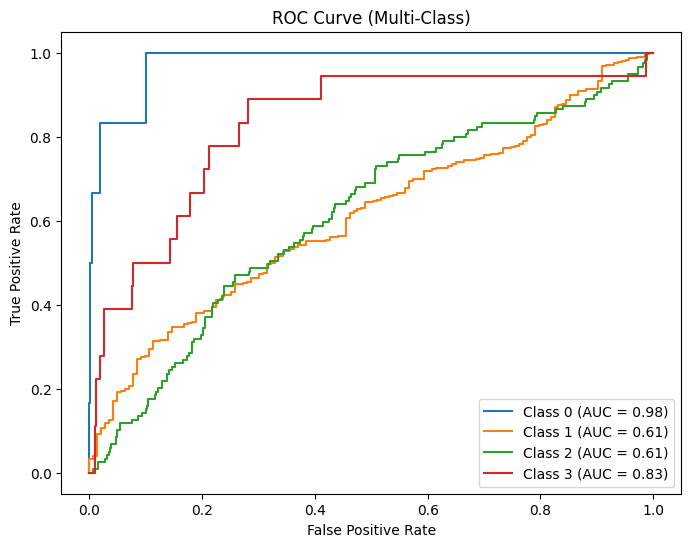

In [103]:
## Evaluate Fine-tuned model + selected features
y_pred = best_model_mse.predict(test_X[selected_features_15])
y_pred_prob = best_model_mse.predict_proba(test_X[selected_features_15])

evaluate_results(y_pred, y_pred_prob, test_y1)

In [ ]:
# OrderedDict([('colsample_bytree', 1.0), ('learning_rate', 0.8389367929885553), ('max_depth', 137), ('n_estimators', 1404), ('num_leaves', 311), ('reg_alpha', 14.709900732508682), ('reg_lambda', 0.8698434487970176), ('subsample', 1.0), ('subsample_freq', 5)])

Accuracy: 0.372
Accuracy within 1 class: 0.744
F1-score (Macro): 0.22987263290881738
F1-score (Weighted): 0.4735348532432814
Kendall's Tau: 0.11390404231450738
Weighted Kappa: 0.08010263979682164
              precision    recall  f1-score   support

           0       0.05      1.00      0.09         6
           1       0.89      0.37      0.52       857
           2       0.16      0.32      0.22       119
           3       0.05      0.78      0.09        18

    accuracy                           0.37      1000
   macro avg       0.29      0.62      0.23      1000
weighted avg       0.79      0.37      0.47      1000



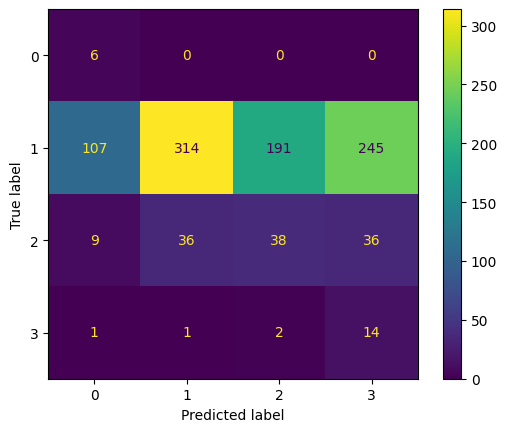

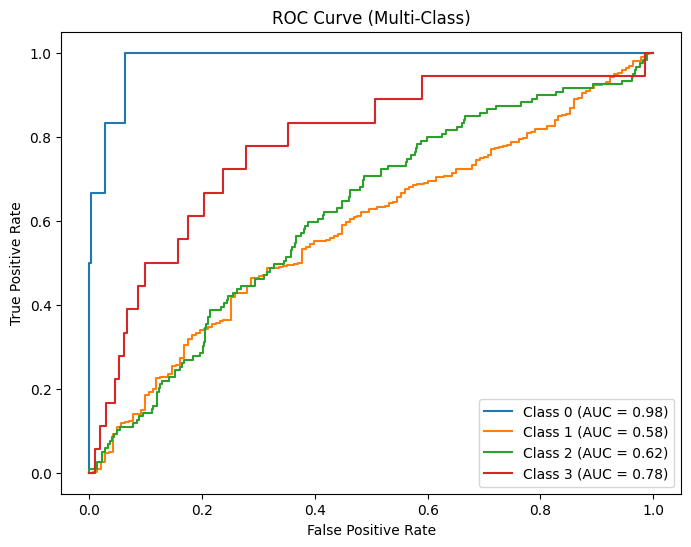

In [104]:
## Evaluate Fine-tuned model + all features

y_pred = best_model_mse1.predict(test_X)
y_pred_prob = best_model_mse1.predict_proba(test_X)

evaluate_results(y_pred, y_pred_prob, test_y1)